# 2. [50pts] Expectation-Maximization (EM) algorithm



In [ ]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt

## 2.1 [7pts] Generating the Data

**a) [5pts]** First, we will generate some data for this problem. Set the number of points $N=400$, their dimension $D=2$, and the number of clusters $K=2$, and generate data from the distribution $p(x|z=k) = N(\mu_k, \Sigma_k)$.
  Sample $200$ data points for $k=1$ and 200 for $k=2$, with

  $$
    \mu_1=
    \begin{bmatrix}
      0.1 \\
      0.1
    \end{bmatrix}
    \ \text{,}\
    \mu_2=
    \begin{bmatrix}
      6.0 \\
      0.1
    \end{bmatrix}
    \ \text{ and }\
    \Sigma_1=\Sigma_2=
    \begin{bmatrix}
      10       & 7 \\
      7 & 10
    \end{bmatrix}
  $$
  Here, $N=400$. If you generate the data, you already know which sample comes from which class. Complete the following statements and run to generate.

  Hint: you can use `np.random.multivariate_normal`.

In [ ]:
num_samples = 400
cov = np.array([[10, 7], [7, 10]])
mean_1 = [0.1, 0.1]
mean_2 = [6.0, 0.1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))

data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

**b) [2pts]** Make a scatter plot of the data points showing the true cluster assignment of each point using different color codes and shape (x for first class and circles for second class):

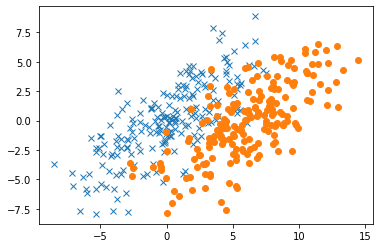

In [ ]:
plt.plot(xy_class1[:,0], xy_class1[:,1], 'x') # first class, x shape
plt.plot(xy_class2[:,0], xy_class2[:,1], 'o') # second class, circle shape

## 2.2 [14pts] Implement and Run K-Means algorithm

Now, we assume that the true class labels are not known. Implement the k-means algorithm for this problem.
  Write two functions: `km_assignment_step`, and `km_refitting_step` as given in the lecture (Here, `km_` means k-means).
  Identify the correct arguments, and the order to run them. Initialize the algorithm with
  $$
    \hat{\mu}_1=
    \begin{bmatrix}
      0.0 \\
      0.0
    \end{bmatrix}
    \ \text{,}\
    \hat{\mu}_2=
    \begin{bmatrix}
      1.0 \\
      1.0
    \end{bmatrix}
  $$
  and run it until convergence.
  Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the cost (distortion in lecture slides) vs. the number of iterations. Report your misclassification error. 

**a) [2pts]** Complete the `cost` function.

In [ ]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
      J += np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R[:, k])
    return J

**b) [4pts]** K-Means assignment step.

In [ ]:
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of clusters
    r = np.zeros((N,K))
    # TODO assign all r[:, k]
    for k in range(K):
        r[:, k] = np.linalg.norm(Mu[:, k] - data, axis = 1)
    arg_min = np.argmin(r, axis = 1) # argmax/argmin along dimension 1
    R_new = np.zeros((N, K)) # Set to zeros/ones with shape (N, K)
    R_new[range(N), arg_min] = 1 # Assign to 1
    return R_new

**c) [2pts]** K-Means refitting step.

In [ ]:
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D = data.shape # number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of clusters
    Mu_new = (data.T @ R)/ np.sum(R, axis = 0)
    return Mu_new

**d) [4pts]** Run this cell to call the K-Means algorithm.

The misclassification error rate of K-means is 0.2625


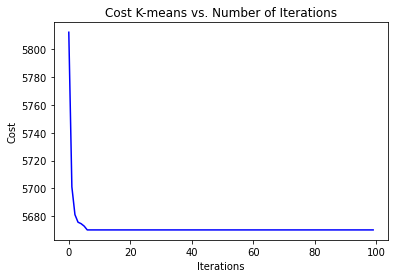

In [ ]:
from matplotlib.layout_engine import get_subplotspec_list
N, D = data.shape
K = 2
max_iter = 100
class_init = np.random.binomial(1., .5, size=N)
R = np.vstack([class_init, 1 - class_init]).T

Mu = np.zeros([D, K])
Mu[:, 1] = 1.
R.T.dot(data), np.sum(R, axis=0)
cost_kmeans = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    Mu = km_refitting_step(data, R, Mu)
    #print(it, cost(data, R, Mu))
    cost_kmeans.append(cost(data, R, Mu))
    
class_1 = np.where(R[:, 0])
class_2 = np.where(R[:, 1])

print('The misclassification error rate of K-means is', np.sum(R[:, 0]==labels)/N)

plt.figure()
plt.title('Cost K-means vs. Number of Iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(np.arange(max_iter), cost_kmeans, 'b-')
plt.show()

**e) [2pts]** Make a scatterplot for the data points showing the K-Means cluster assignments of each point.


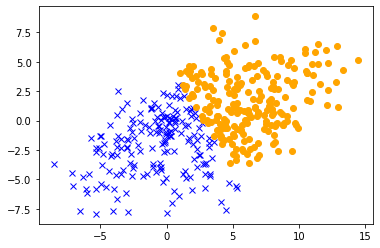

In [ ]:
plt.plot(data[class_1, 0], data[class_1,1], 'x', color = "blue") # TODO first class, x shape
plt.plot(data[class_2,0], data[class_2,1], 'o', color = "orange") # TODO second class, circle shape
plt.show()

## 2.3 [21pts] Implement EM algorithm for Gaussian mixtures

Next, implement the EM algorithm for Gaussian mixtures. Write three functions: `log_likelihood`, `gm_e_step`, and `gm_m_step` as given in the lecture.
  - Identify the correct arguments, and the order to run them.
  - Initialize the algorithm with the same initialization as in Q2.1 for the means, and with $\hat\Sigma_1=\hat\Sigma_2=I$, and $\hat\pi_1=\hat\pi_2$ for the covariances.
    
Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes or shape or both. Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

In [ ]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

**a) [5pts]** Log-Likelihood.

In [ ]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    N, D = data.shape 
    K = Mu.shape[1] 
    L, T = 0., 0.
    for n in range(N):
        for k in range(K):
            T += Pi[k] * normal_density(data[n], Mu[:, k], Sigma[k]) 
        L += np.log(T)
    return L

**b) [5pts]** Gaussian Mixture Expectation Step.

In [ ]:
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """
    N, D = data.shape 
    K = Mu.shape[1] 
    Gamma = np.zeros((N, K)) 
    for n in range(N):
        for k in range(K):
            Gamma[n, k] = Pi[k] * normal_density(data[n], Mu[:, k], Sigma[k]) 
        Gamma[n, :] /=  np.sum(Gamma[n, :]) 
    return Gamma

**c) [5pts]** Gaussian Mixture Maximization Step.

In [ ]:
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Gamma.shape[1] # number of mixtures
    Nk = np.sum(Gamma, axis=0)
    Mu = np.dot(data.T, Gamma) / Nk
    Sigma = []
    for k in range(K):
        Xm = data - Mu[:,k]
        Sigma.append(np.dot(Gamma[:,k] * Xm.T, Xm) / Nk[k])
    Pi = Nk / N
    return Mu, Sigma, Pi


**d) [4pts]** Run this cell to call the Gaussian Mixture EM algorithm.

The missclassification error rate of Gaussian Mixture EM algorithm is:  0.1075


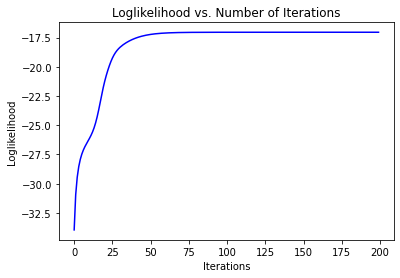

In [ ]:
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 
max_iter  = 200
gau_loglike = []

for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    gau_loglike.append(log_likelihood(data, Mu, Sigma, Pi))

class_1 = np.where(Gamma[:, 0] >= 0.5)
class_2 = np.where(Gamma[:, 1] >= 0.5)

print('The missclassification error rate of Gaussian Mixture EM algorithm is: ',  np.sum(np.float32(Gamma[:, 0] >= 0.5)==labels)/N)

plt.figure()
plt.title('Loglikelihood vs. Number of Iterations')
plt.ylabel('Loglikelihood')
plt.xlabel('Iterations')
plt.plot(np.arange(max_iter), gau_loglike, 'b-')
plt.show()

**e) [2pts]** Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point

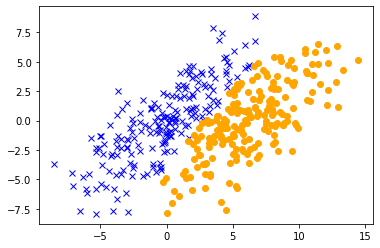

In [ ]:
plt.plot(data[class_1, 0], data[class_1, 1], 'x', color = "blue") # TODO first class, x shape
plt.plot(data[class_2, 0], data[class_2, 1], 'o', color = "orange") # TODO second class, circle shape
plt.show()

## 2.4 [8pts] Comment on findings + additional experiments

Comment on the results:

* Compare the performance of k-Means and EM based on the resulting cluster assignments. [2pts]
* Compare the performance of k-Means and EM based on their convergence rate. What is the bottleneck for which method? [2pts]
* Experiment with 5 different data realizations (generate new data), run your algorithms, and summarize your findings. Does the algorithm performance depend on different realizations of data? [3pts]
* Comment on what might happen as you increase the number $K$ of clusters. [1pts]
 


*Your* answer here.

1. The EM algorithm achieves better classification with a lower misclassification error. And the resulting scatterplot using EM algorithm is more similar to the true scatterplot.

2. In comparison, k-means algorithm converges faster than EM algorithm. 
The bottleneck for k-means is around 5 and the bottleneck for EM algorithm is around 25.

3. After experimenting with 5 different data realizations, the misclassfication error rate of k-means is still higher than EM. Therefore, the algorithm performance doesn't depend on different realizations of data.

4. Increase the number K of clusters may result in a smaller misclassification error rate.